In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
def GenPathsGBABM(S0, mu, sigma, T, Nofpaths, Nofsteps):
    np.random.seed(100)
    dt = T/float(Nofsteps)
    Z = np.random.normal(0.0, 1.0, (Nofpaths, Nofsteps))
    S = np.zeros((Nofpaths, Nofsteps +1))
    logS = np.zeros((Nofpaths, Nofsteps +1))
    time = np.zeros(Nofsteps +1)
    logS[:, 0] = np.log(S0)


    for t in range(0, Nofsteps):
        logS[:, t+1] = logS[:, t] + (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t]
        time[t+1] = time[t] + dt
    S = np.exp(logS)
    paths = {"time" : time, "S" : S, "logS" : logS }
    return paths

In [13]:
def plotGBM(S0, mu, sigma, T, Nofpaths, Nofsteps):
    paths = GenPathsGBABM(S0, mu, sigma, T, Nofpaths, Nofsteps)
    time = paths["time"]
    logS = paths["logS"]
    S = paths["S"]
    plt.figure(figsize=(29,8))
    for i in range(Nofpaths):
        plt.plot(time, S[i, :], lw =0.3)
    plt.title(f"Geometric Brownian Motion: mu={mu}, sigma={sigma}")
    plt.xlabel("Time(years)")
    plt.ylabel("Asset Price")
    plt.grid(True)
    plt.show()  
    plt.figure(figsize=(29,8))
    for i in range(Nofpaths):
        plt.plot(time, logS[i, :], lw =0.3)
    plt.title(f"Geometric Brownian Motion: mu={mu}, sigma={sigma}")
    plt.xlabel("Time(years)")
    plt.ylabel("Asset Price(log)")
    plt.grid(True)
    plt.show()  
    df = pd.DataFrame(S[:, -1])
    plt.figure(figsize=(40,8))
    plt.hist(df[0], bins=100)
    plt.title("Final Asset Price Distribution Histogram")
    plt.xlabel("Asset Price")   
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [14]:
def calc(Nofpaths):
    Nofsteps = 252*60
    S0 = 190
    T = 1
    mu = 0.1
    sigma = 0.3
    plotGBM(S0, mu, sigma, T, Nofpaths, Nofsteps)

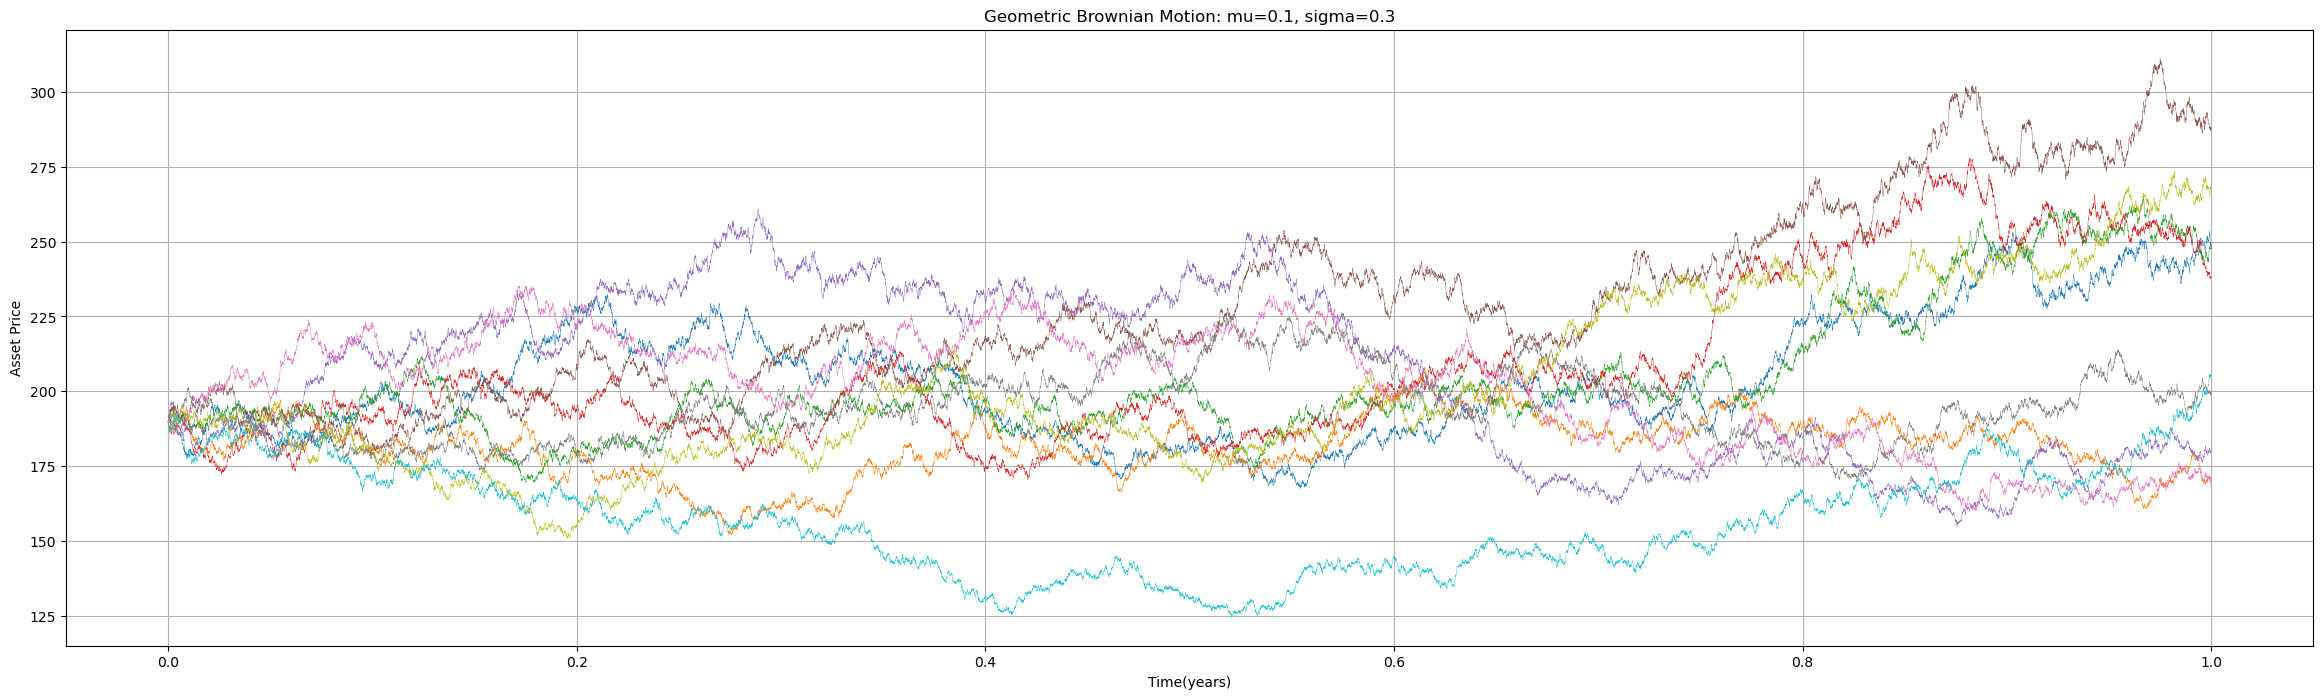

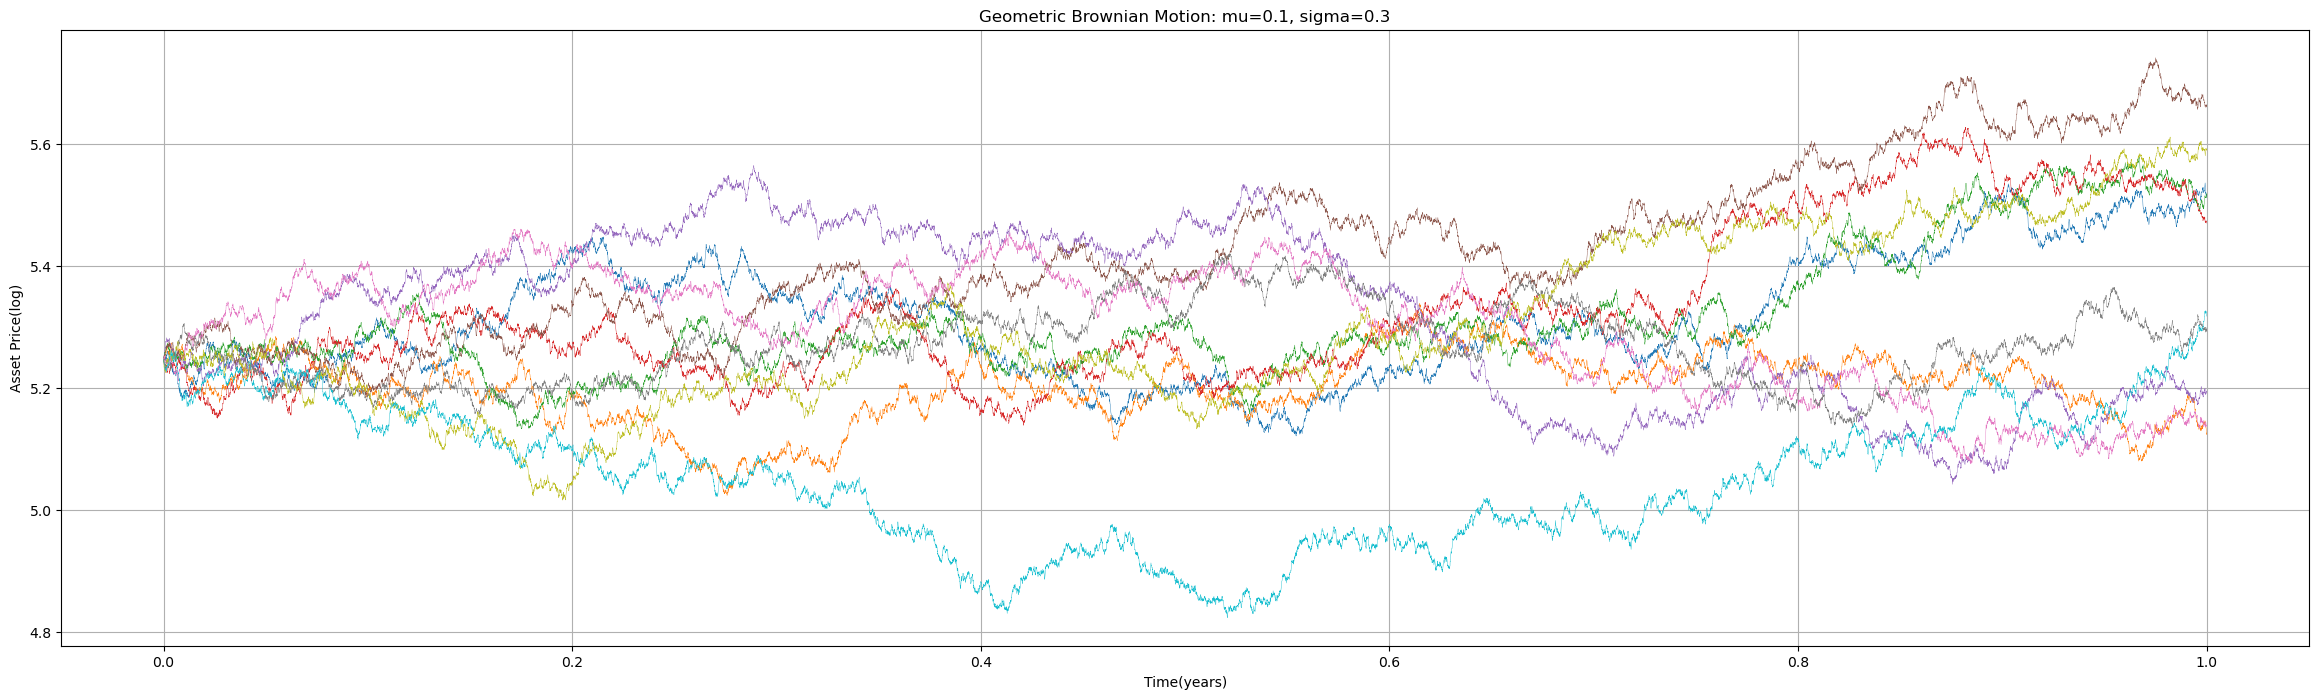

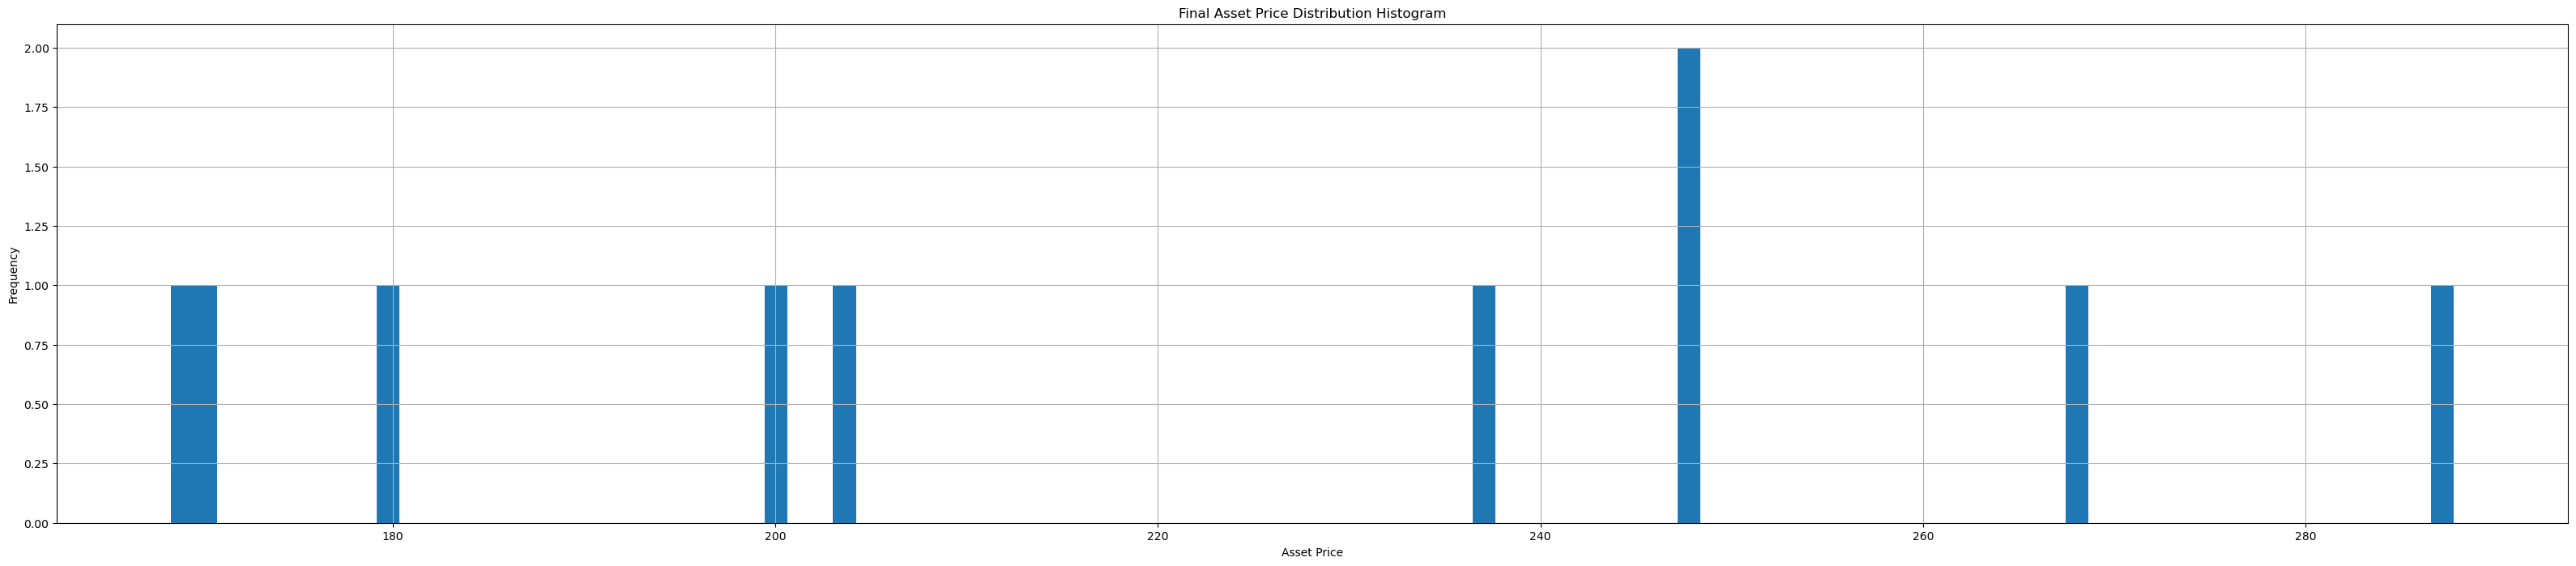

In [15]:
calc(10)
